#   Global Earthquake–Tsunami Risk Assessment

##   The Dataset Goal & Source
**Goal:** Predict whether an earthquake will generate a tsunami (binary classification).  
**Source:** [Kaggle – Global Earthquake–Tsunami Risk Assessment](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)

---

##   General Information
- **Number of observations:** 984 earthquakes  
- **Number of features:** 19  
- **Data types:** Numerical (magnitude, depth), categorical (type, network), geographic (latitude, longitude)  
- **Target variable:** `Tsunami` → `1` = Tsunami, `0` = No tsunami  

>   About 61.1% of events are non-tsunami and 38.9% are tsunami.


In [10]:
from google.colab import files
uploaded = files.upload()

Saving earthquake_data_tsunami.csv to earthquake_data_tsunami (1).csv


In [11]:
import pandas as pd
df = pd.read_csv('earthquake_data_tsunami.csv')

#   Summary & Visualization for Global Earthquake–Tsunami Risk Assessment

  Dataset Shape: (782, 13)

  Columns:
 ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']

  Data Types:
 magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
magnitude,782.0,6.941125,0.445514,6.5000,6.60000,6.8000,7.1000,9.1000
cdi,782.0,4.333760,3.169939,0.0000,0.00000,5.0000,7.0000,9.0000
mmi,782.0,5.964194,1.462724,1.0000,5.00000,6.0000,7.0000,9.0000
sig,782.0,870.108696,322.465367,650.0000,691.00000,754.0000,909.7500,2910.0000
nst,782.0,230.250639,250.188177,0.0000,0.00000,140.0000,445.0000,934.0000
dmin,782.0,1.325757,2.218805,0.0000,0.00000,0.0000,1.8630,17.6540
gap,782.0,25.038990,24.225067,0.0000,14.62500,20.0000,30.0000,239.0000
depth,782.0,75.883199,137.277078,2.7000,14.00000,26.2950,49.7500,670.8100
latitude,782.0,3.538100,27.303429,-61.8484,-14.59560,-2.5725,24.6545,71.6312
longitude,782.0,52.609199,117.898886,-179.9680,-71.66805,109.4260,148.9410,179.6620



  Variance of Numerical Columns:

magnitude         0.198483
cdi              10.048513
mmi               2.139561
sig          103983.912626
nst           62594.124039
dmin              4.923095
gap             586.853861
depth         18844.996197
latitude        745.477245
longitude     13900.147318
Year             37.203161
Month            12.305126
tsunami           0.237927
dtype: float64
  No missing values detected.


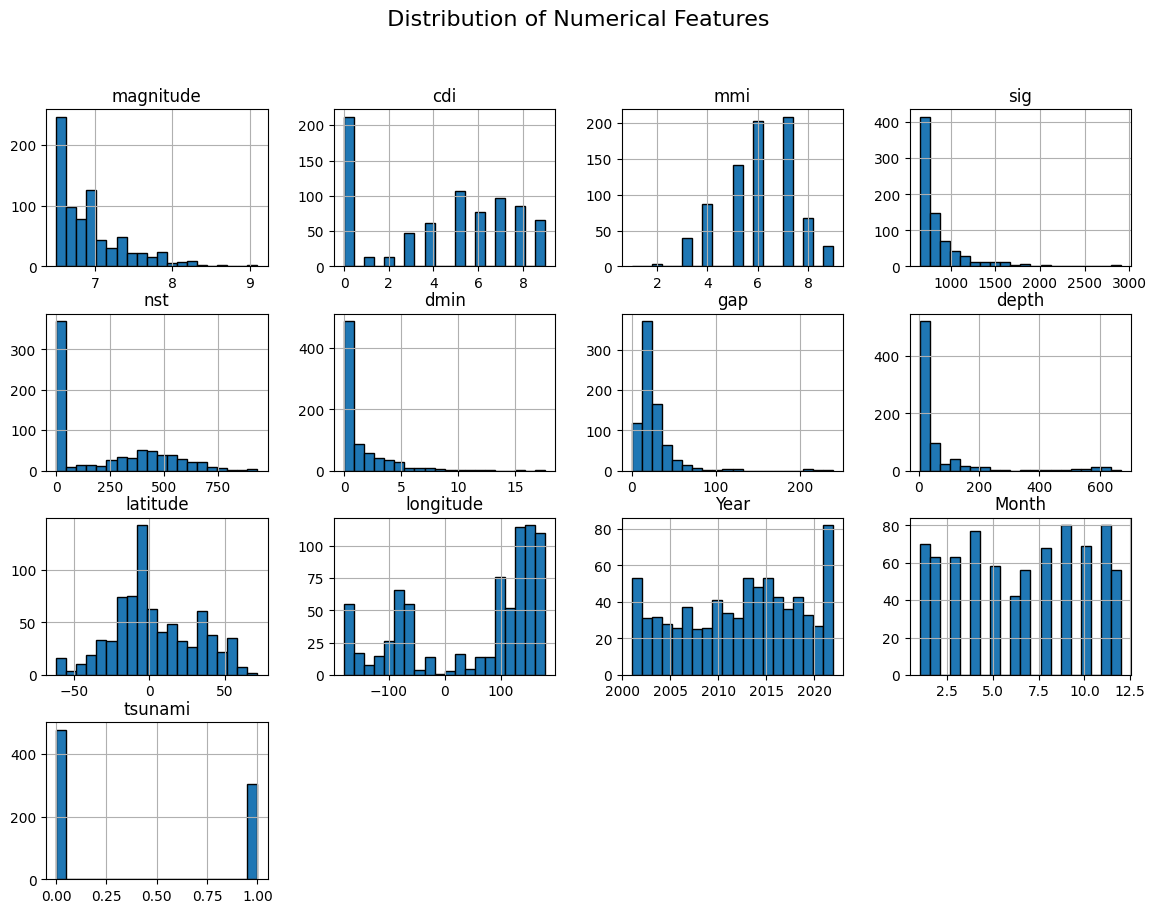

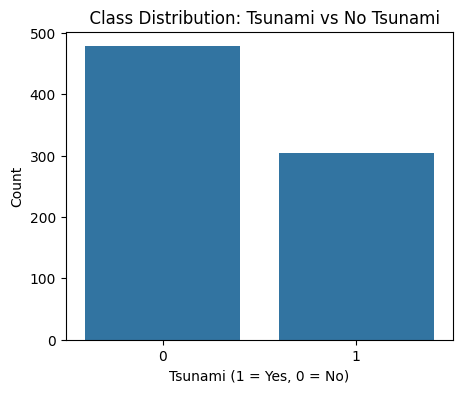


  Class Balance:
 tsunami
0    0.611253
1    0.388747
Name: proportion, dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # For Colab/Jupyter 'display' function

# Load dataset (corrected file name)
df = pd.read_csv("earthquake_data_tsunami.csv")

# ----- 1. General Overview -----
print("  Dataset Shape:", df.shape)
print("\n  Columns:\n", df.columns.tolist())
print("\n  Data Types:\n", df.dtypes)

# ----- 2. Statistical Summary -----
display(df.describe(include='all').transpose())

# Variance for numerical features
print("\n  Variance of Numerical Columns:\n")
print(df.var(numeric_only=True))

# ----- 3. Missing Value Analysis -----
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if not missing.empty:
    plt.figure(figsize=(8,4))
    sns.barplot(x=missing.values, y=missing.index, palette="viridis")
    plt.title("  Missing Values per Feature")
    plt.xlabel("Count")
    plt.ylabel("Feature")
    plt.show()
else:
    print("  No missing values detected.")

# ----- 4. Distribution of Key Numerical Features -----
num_cols = df.select_dtypes(include=['float64','int64']).columns

df[num_cols].hist(bins=20, figsize=(14,10), edgecolor='black')
plt.suptitle("  Distribution of Numerical Features", fontsize=16)
plt.show()

# ----- 5. Class Imbalance (Target Variable) -----
if 'tsunami' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x='tsunami')
    plt.title("  Class Distribution: Tsunami vs No Tsunami")
    plt.xlabel("Tsunami (1 = Yes, 0 = No)")
    plt.ylabel("Count")
    plt.show()

    tsunami_ratio = df['tsunami'].value_counts(normalize=True)
    print("\n  Class Balance:\n", tsunami_ratio)
else:
    print(" Target column 'tsunami' not found — please verify column name.")

##   Preprocessing Techniques and Justifications

### 1. Variable Transformation
- **What:** Ensure features like `latitude`, `longitude`, `depth`, and `magnitude` are converted to numeric (float) types. The `tsunami` column is encoded as integer or categorical (0/1).
- **Why:** Correct data types ensure valid mathematical operations and compatibility with ML models.

### 2. Discretization
- **What:** (If performed) Convert continuous variables like `magnitude` into categorical bins (e.g., weak, moderate, strong).
- **Why:** Simplifies modeling for tree-based classifiers or human analysis, though not always needed for modern algorithms.

### 3. Handling Missing Values
- **What:** Check for and address missing data (imputation or removal).  
  _Note: This dataset reportedly has no missing values._
- **Why:** Missing values can disrupt model training and statistical calculations.

### 4. Value/Variable Removal
- **What:** Drop irrelevant/uninformative columns (e.g., unique IDs, columns with constant values).
- **Why:** Removes noise, reduces dimensionality, and streamlines model training.

### 5. Normalization (Feature Scaling)
- **What:** Scale numeric features using Min-Max scaling or Z-score standardization.
- **Why:** Places all features on a similar scale, speeding up model convergence and preventing dominance by large-scale features.

### 6. Encoding Categorical Variables
- **What:** Encode `tsunami` as binary (0 = No, 1 = Yes).
- **Why:** Many ML algorithms require numeric input for the target variable.

### 7. Outlier Detection and Treatment
- **What:** Identify and, if necessary, treat outliers in variables like `magnitude` or `depth`.
- **Why:** Outliers can bias or mislead sensitive models, impacting accuracy.

### 8. Class Imbalance Handling
- **What:** Evaluate the distribution of the target (`tsunami`). Apply oversampling, undersampling, or class weighting if imbalance exists.
- **Why:** Balanced classes are crucial for reliable and unbiased model evaluation.

---